In [74]:
# System Libraries
import os
import sys

# Add the src directory to the notebook path
#src_path = os.path.abspath(os.path.join('..', 'src'))
#sys.path.append(src_path)


# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
#import phik
#from phik.report import plot_correlation_matrix
#from phik import report
#from sklearn.decomposition import PCA

# Statistics libraries
#from scipy.stats import spearmanr


# machine learning libraries
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Importing SMOTE for data balancing
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Metrics libraries
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import roc_curve, auc 
from sklearn.model_selection import KFold, cross_val_score

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV


# Utility libraries
import warnings
warnings.filterwarnings("ignore")

# Define custom color palette
#custom_palette = {"Positive":"Blue","Negative":"Orange"}

In [2]:
# load the csv data
df = pd.read_csv("../datasets/bank-additional-full.csv", delimiter= ';')

In [3]:
# load first five rows of data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# load last row of data
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# check for column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# check for information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# check the shape of the dataframe
df.shape

(41188, 21)

In [8]:
# Checking for duplication 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

In [9]:
# Checking for sum of duplicates
df.duplicated().sum()

np.int64(12)

In [10]:
# Check for nulls
df.isna().sum().sum()

np.int64(0)

In [11]:
# perform descriptive statistics on data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [12]:
# Checking for nunique
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [15]:
# Define a function to check for the number of unique values in categorical columns
def check_unique_values(df):
    """
    Check the number of unique values in the categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    print("Checking unique values in categorical columns:")

    # Iterate through each column
    for col in df.columns:
        # Check if the column is categorical (object type) 
        if ((df[col].dtype == 'object') or (df[col].dtype == 'bool')):
            # Print the column name and its unique values
            print(col, '---->', df[col].unique())

In [16]:
# Call the function to check unique values for the dataFrame
check_unique_values(df)

Checking unique values in categorical columns:
job ----> ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital ----> ['married' 'single' 'divorced' 'unknown']
education ----> ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default ----> ['no' 'unknown' 'yes']
housing ----> ['no' 'yes' 'unknown']
loan ----> ['no' 'yes' 'unknown']
contact ----> ['telephone' 'cellular']
month ----> ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week ----> ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome ----> ['nonexistent' 'failure' 'success']
y ----> ['no' 'yes']


### Univariate Analysis

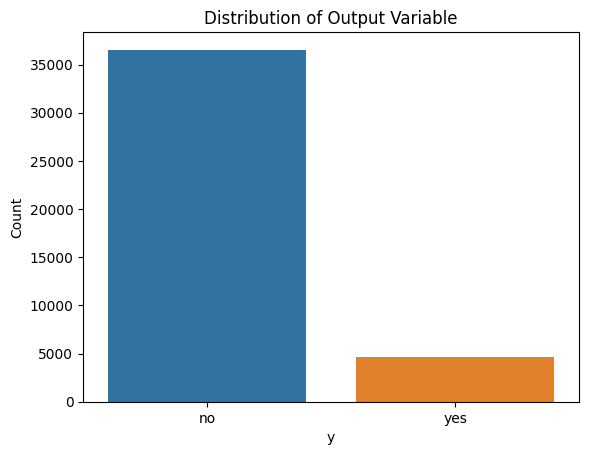

In [29]:
# Distribution of outcome 'y'
sns.countplot(x='y', data=df, color = 'blue', palette = ['tab:blue', 'tab:orange', 'tab:red', 'tab:green'])
plt.title("Distribution of Output Variable")
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

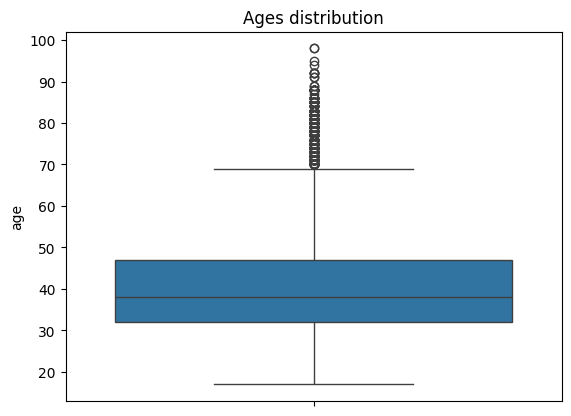

In [17]:
# Distribution of outcome age
sns.boxplot(data = df['age'])

plt.title('Ages distribution')
plt.show()

Text(0.5, 1.0, 'Distribution of jobs')

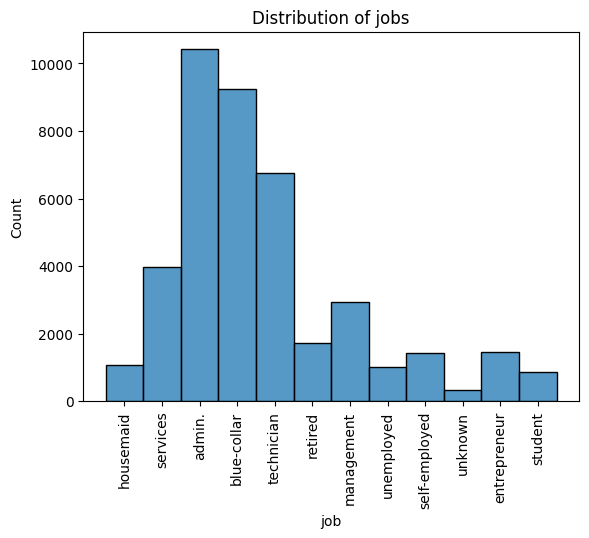

In [40]:
# Distribution of outcome jobs
sns.histplot(data = df['job'])

plt.xticks(rotation=90)
plt.title('Distribution of jobs')

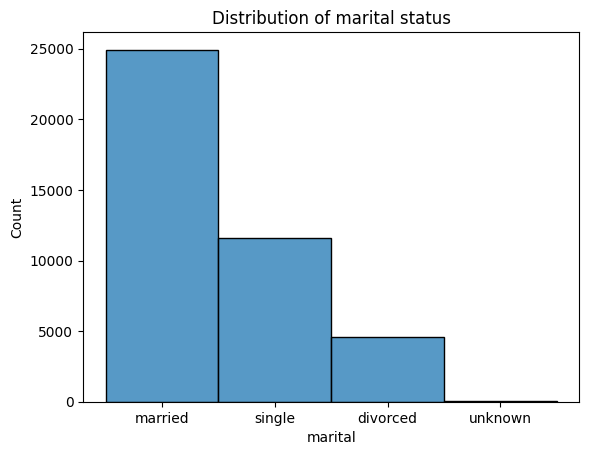

In [32]:
# Distribution of outcome marital status
sns.histplot(data = df['marital'])

plt.title('Distribution of marital status')
plt.show()

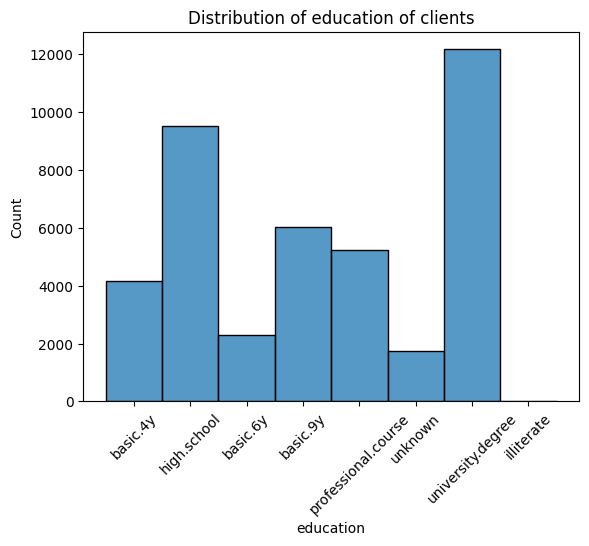

In [38]:
# Distribution of education of clients
sns.histplot(data = df['education'])
plt.xticks(rotation=45)

plt.title('Distribution of education of clients')
plt.show()

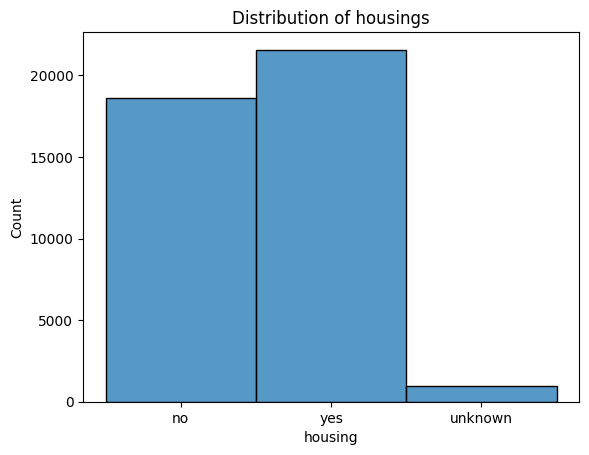

In [34]:
# Distribution of housings
sns.histplot(data=df['housing'])

plt.title('Distribution of housings')
plt.show()

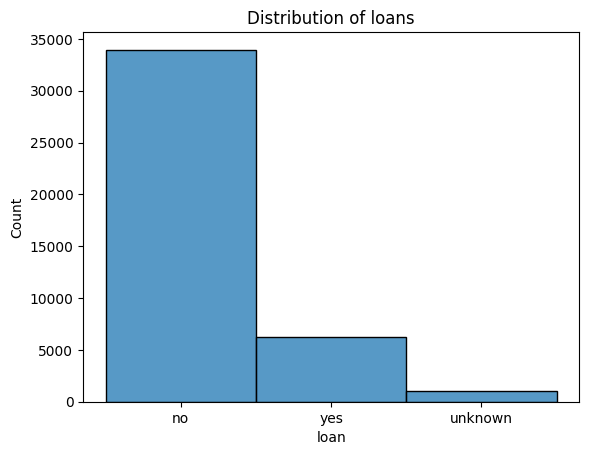

In [35]:
# Distribution of loans
sns.histplot(data=df['loan'])

plt.title('Distribution of loans')
plt.show()

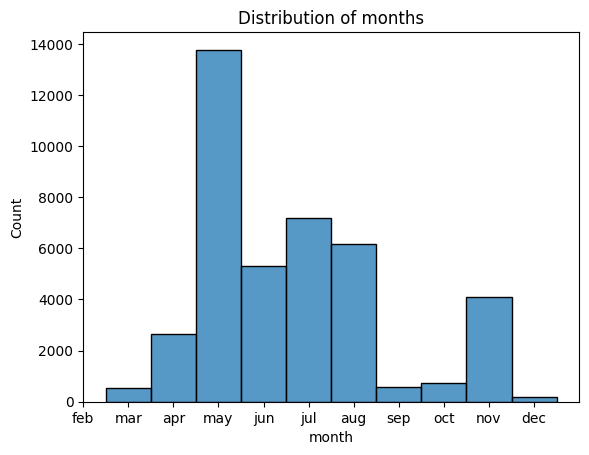

In [36]:
# Distribution of months
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

sns.histplot(data=df['month'])

plt.title('Distribution of months')
plt.show()

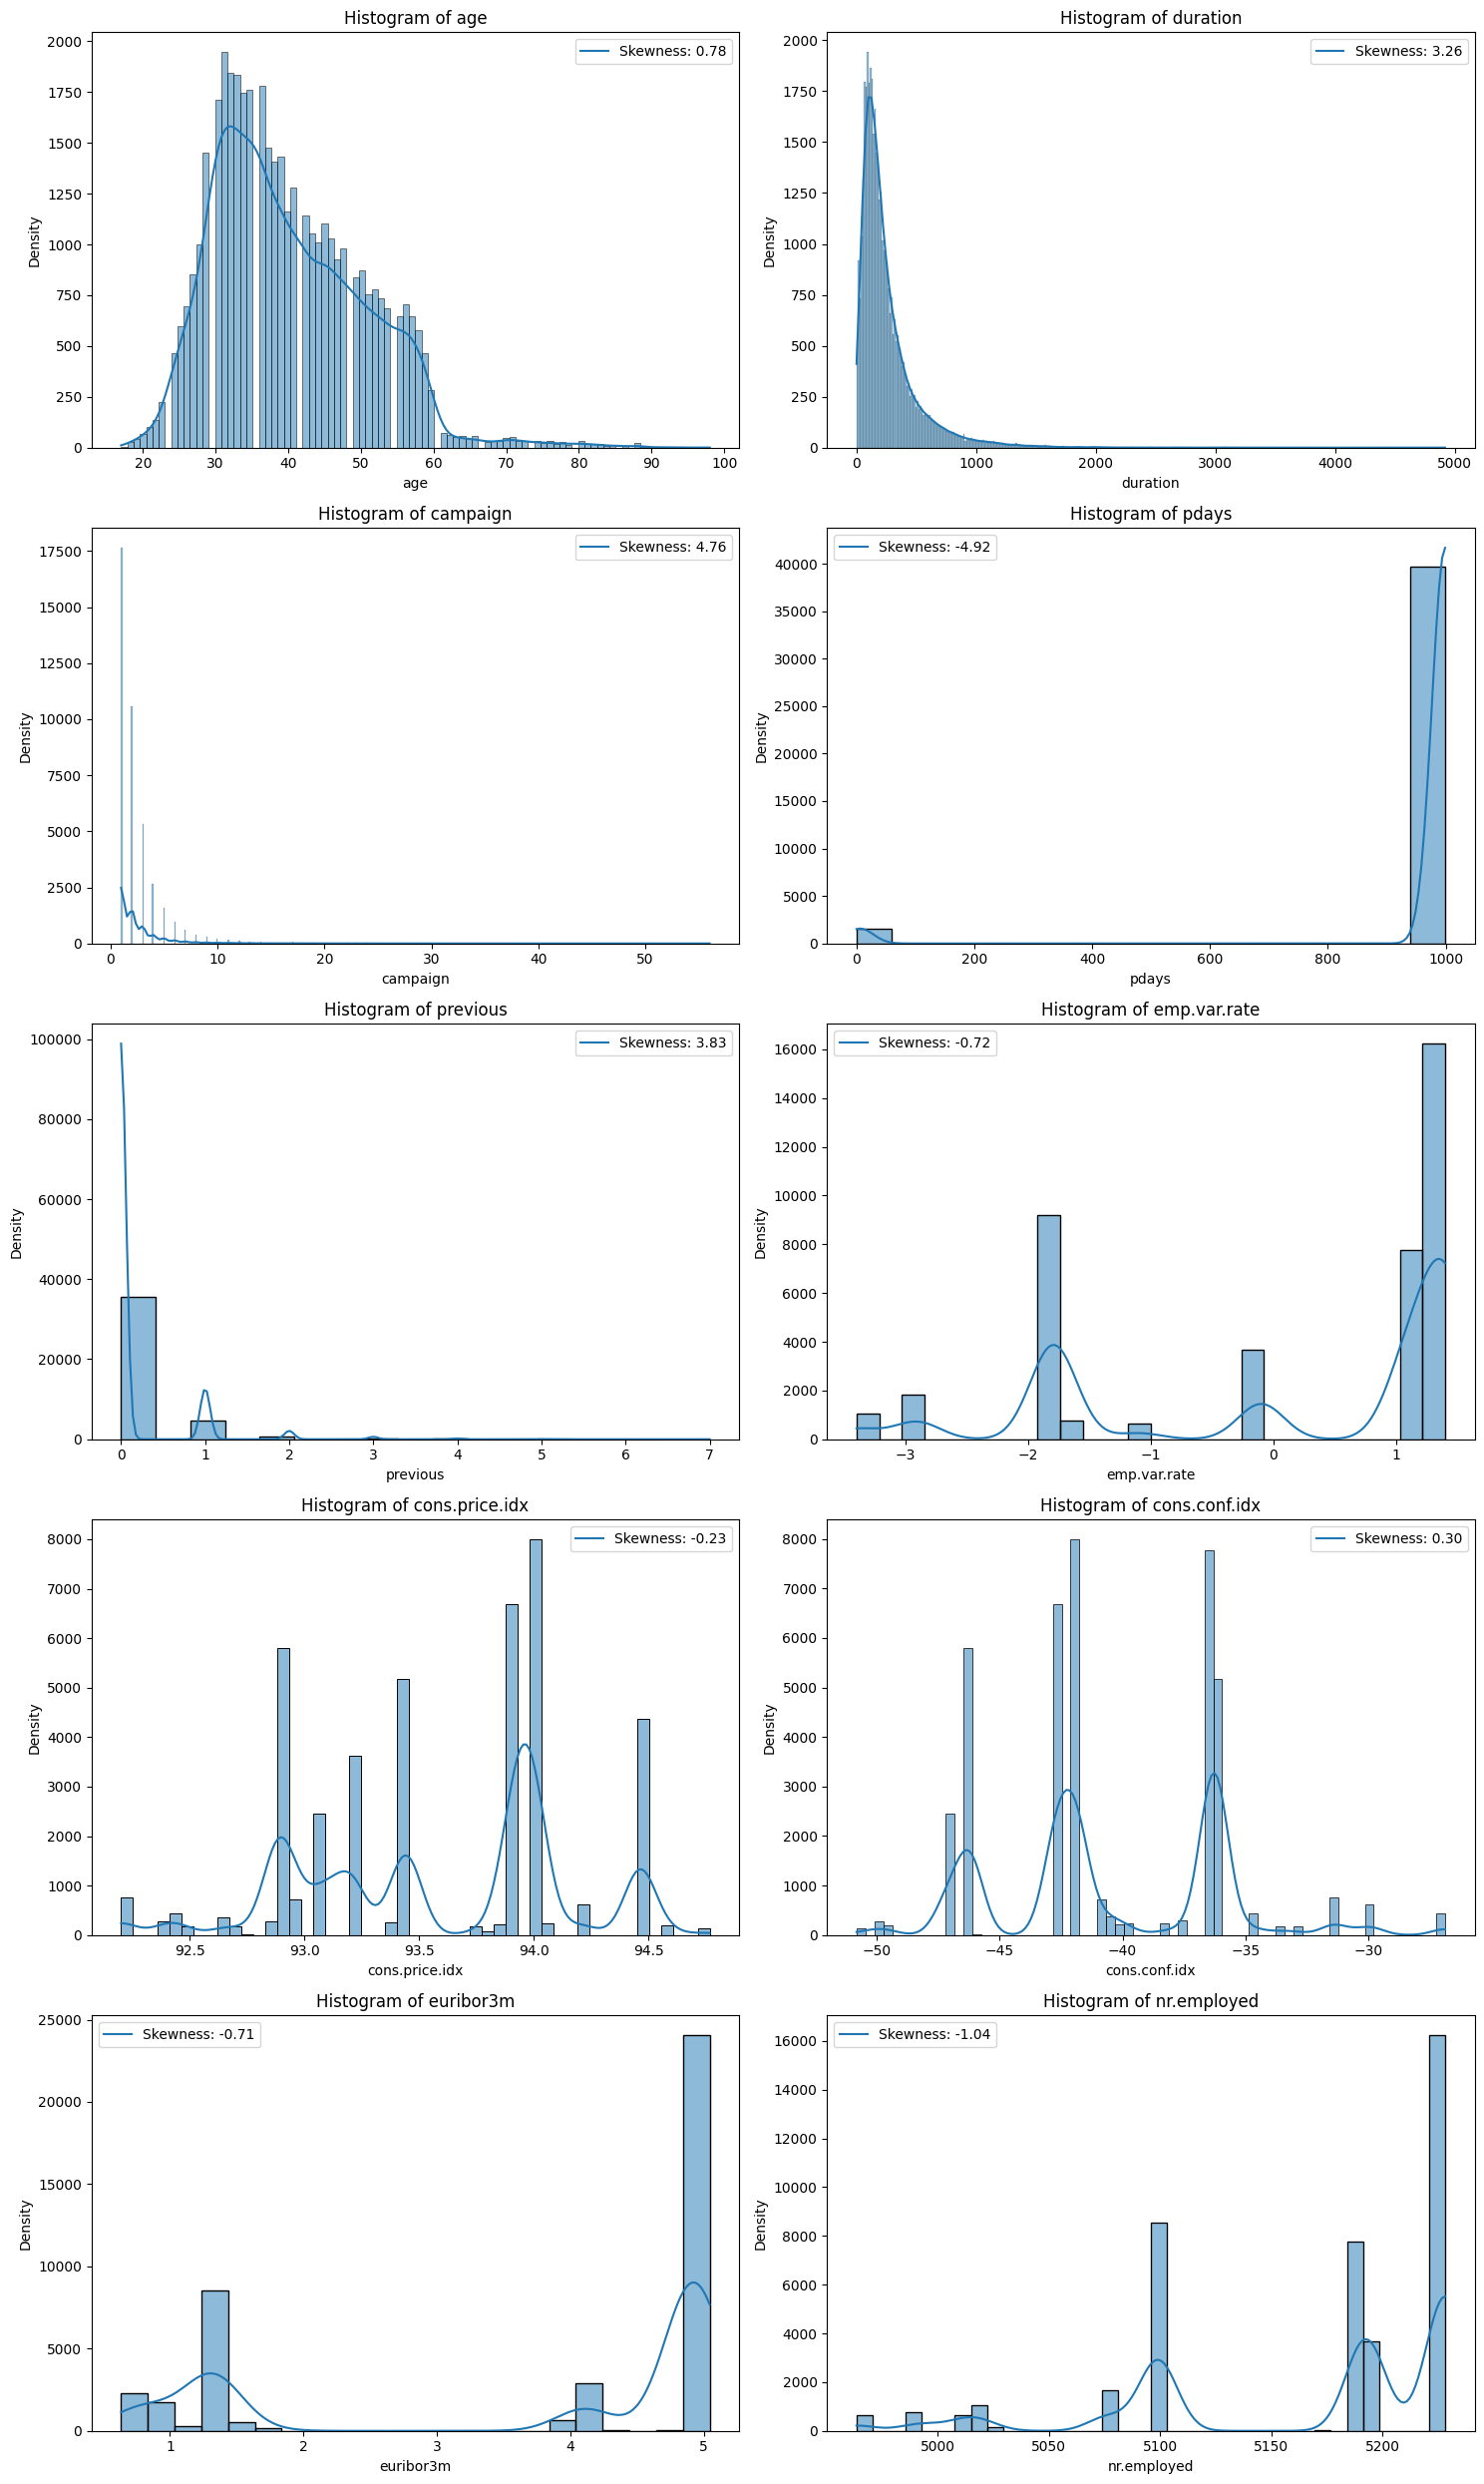

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Calculate grid dimensions dynamically
num_plots = len(numeric_columns)
num_rows = (num_plots + 1) // 2  # 2 plots per row
num_columns = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through numeric columns and plot
for id, column in enumerate(numeric_columns):
    sns.histplot(df[column], ax=axes[id], kde=True)
    skewness = df[column].skew()
    axes[id].legend([f"Skewness: {skewness:.2f}"])
    axes[id].set_title(f"Histogram of {column}")
    axes[id].set_ylabel("Density")

# Turn off any unused subplot axes
for ax in axes[num_plots:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


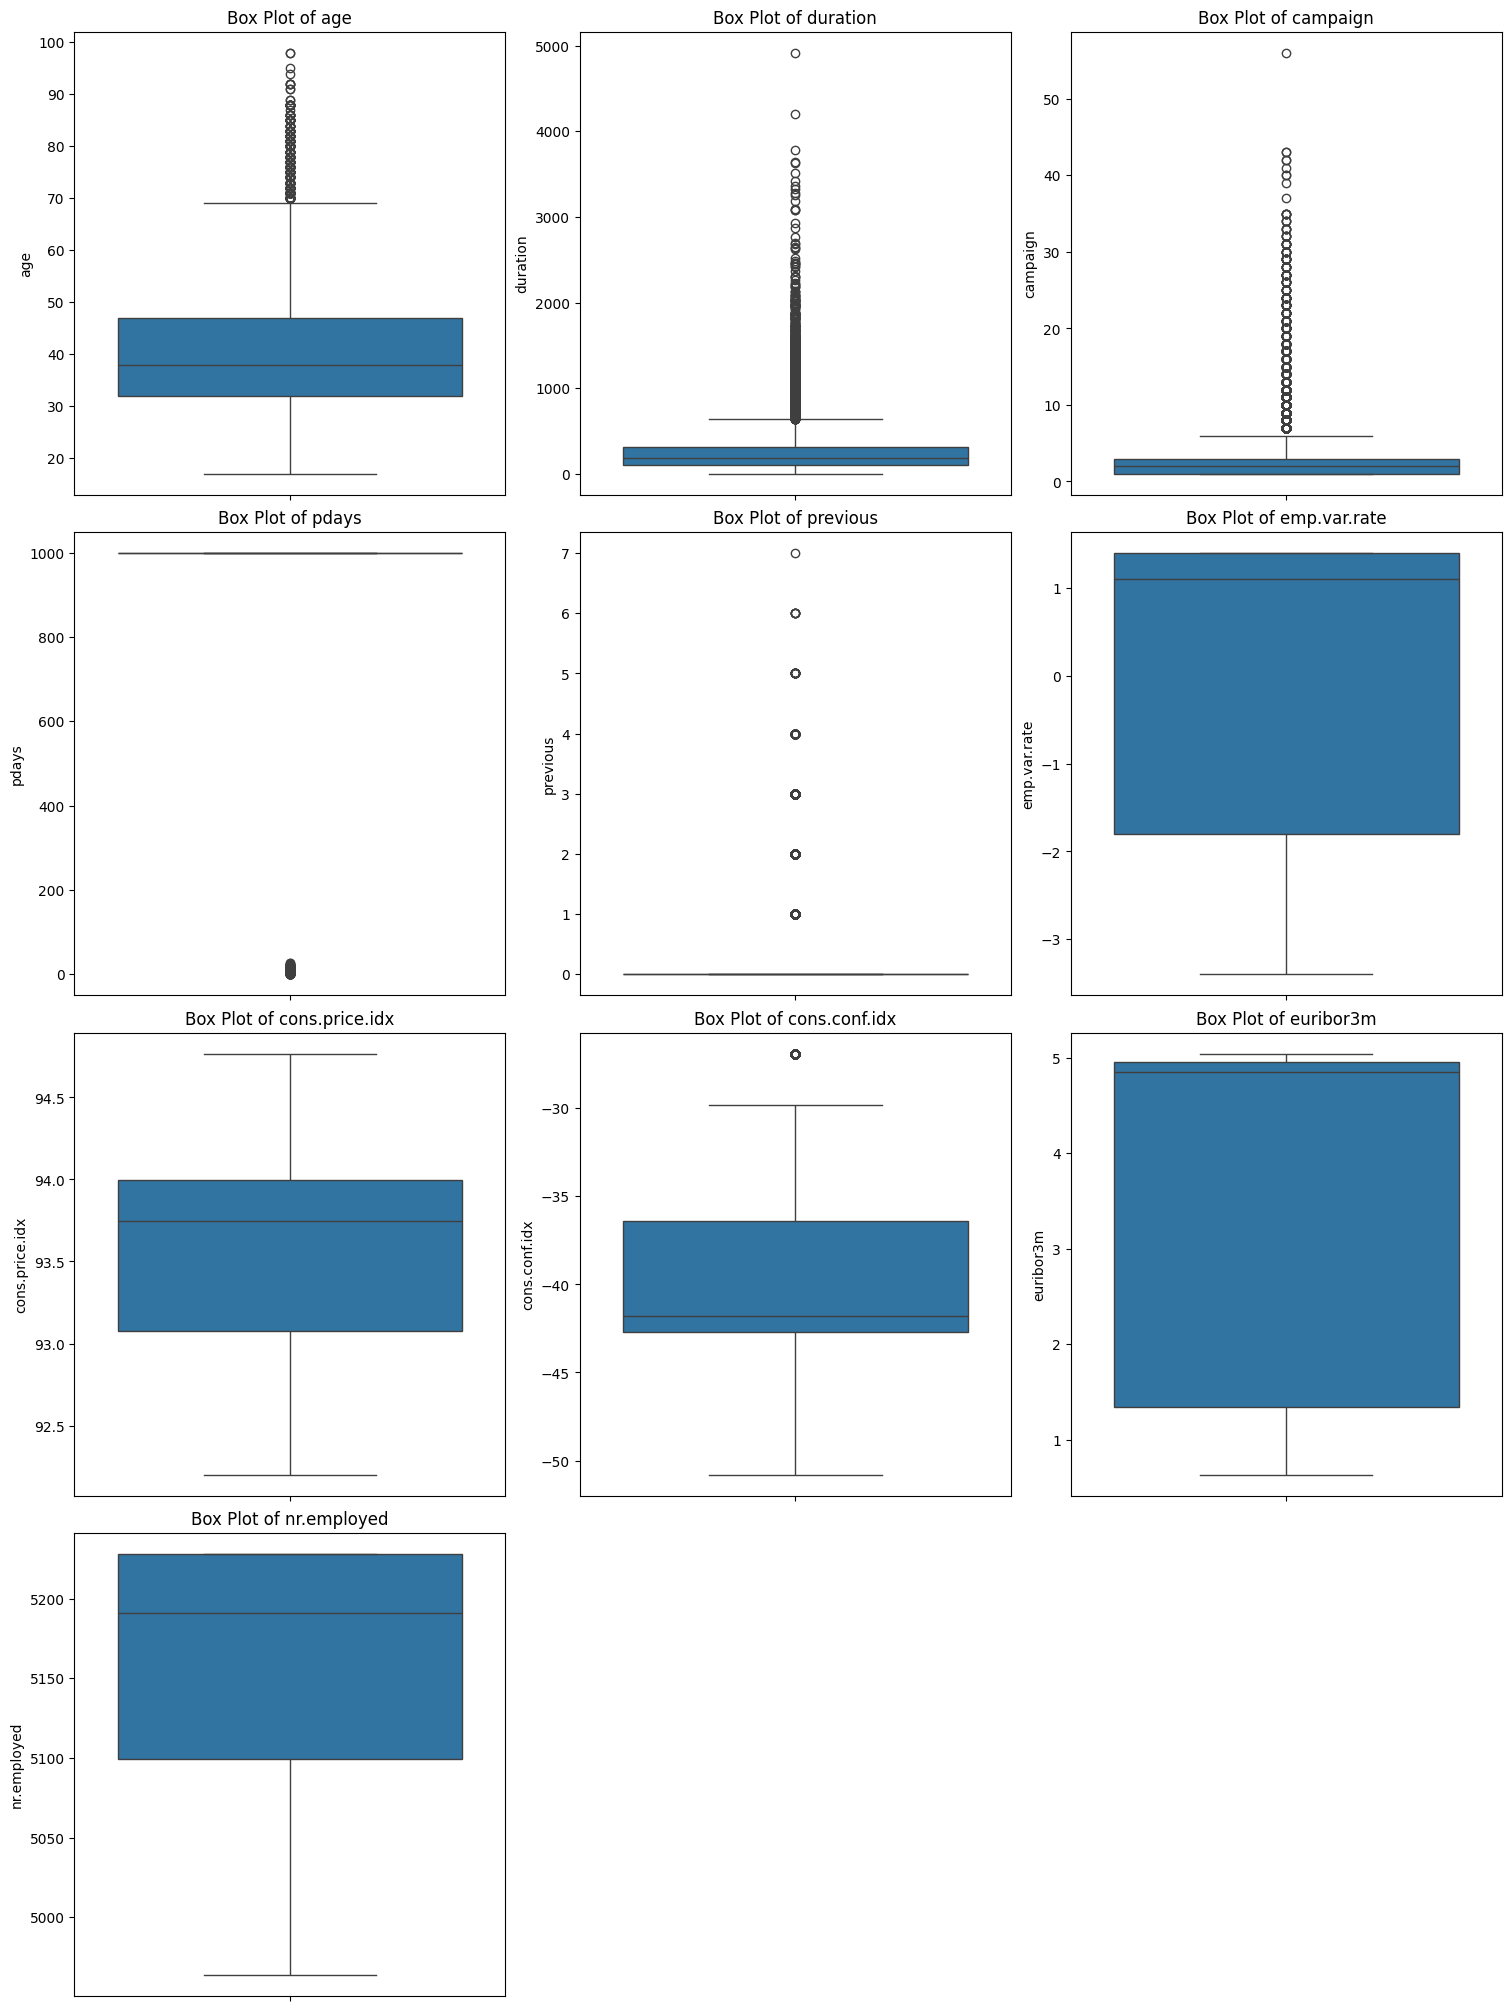

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter numeric columns
numeric_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Determine grid size for subplots (rows and columns)
num_cols = len(numeric_columns)
nrows = (num_cols + 2) // 3  # 3 plots per row; adjust as needed
ncols = min(3, num_cols)     # At most 3 columns in a row

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows), constrained_layout=True)

# Flatten axes array if it's multidimensional
axes = axes.flatten() if nrows > 1 else [axes]

# Loop through numeric columns and plot
for id, column in enumerate(numeric_columns):
    sns.boxplot(data=df, y=column, ax=axes[id])
    axes[id].set_title(f"Box Plot of {column}")
    axes[id].set_xlabel("")
    axes[id].set_ylabel(column)

# Turn off unused axes if any
for ax in axes[num_cols:]:
    ax.axis('off')

plt.show()


### **Bivariate Analysis**

#### **Exploring Numeric variable columns with y (Output variable)**

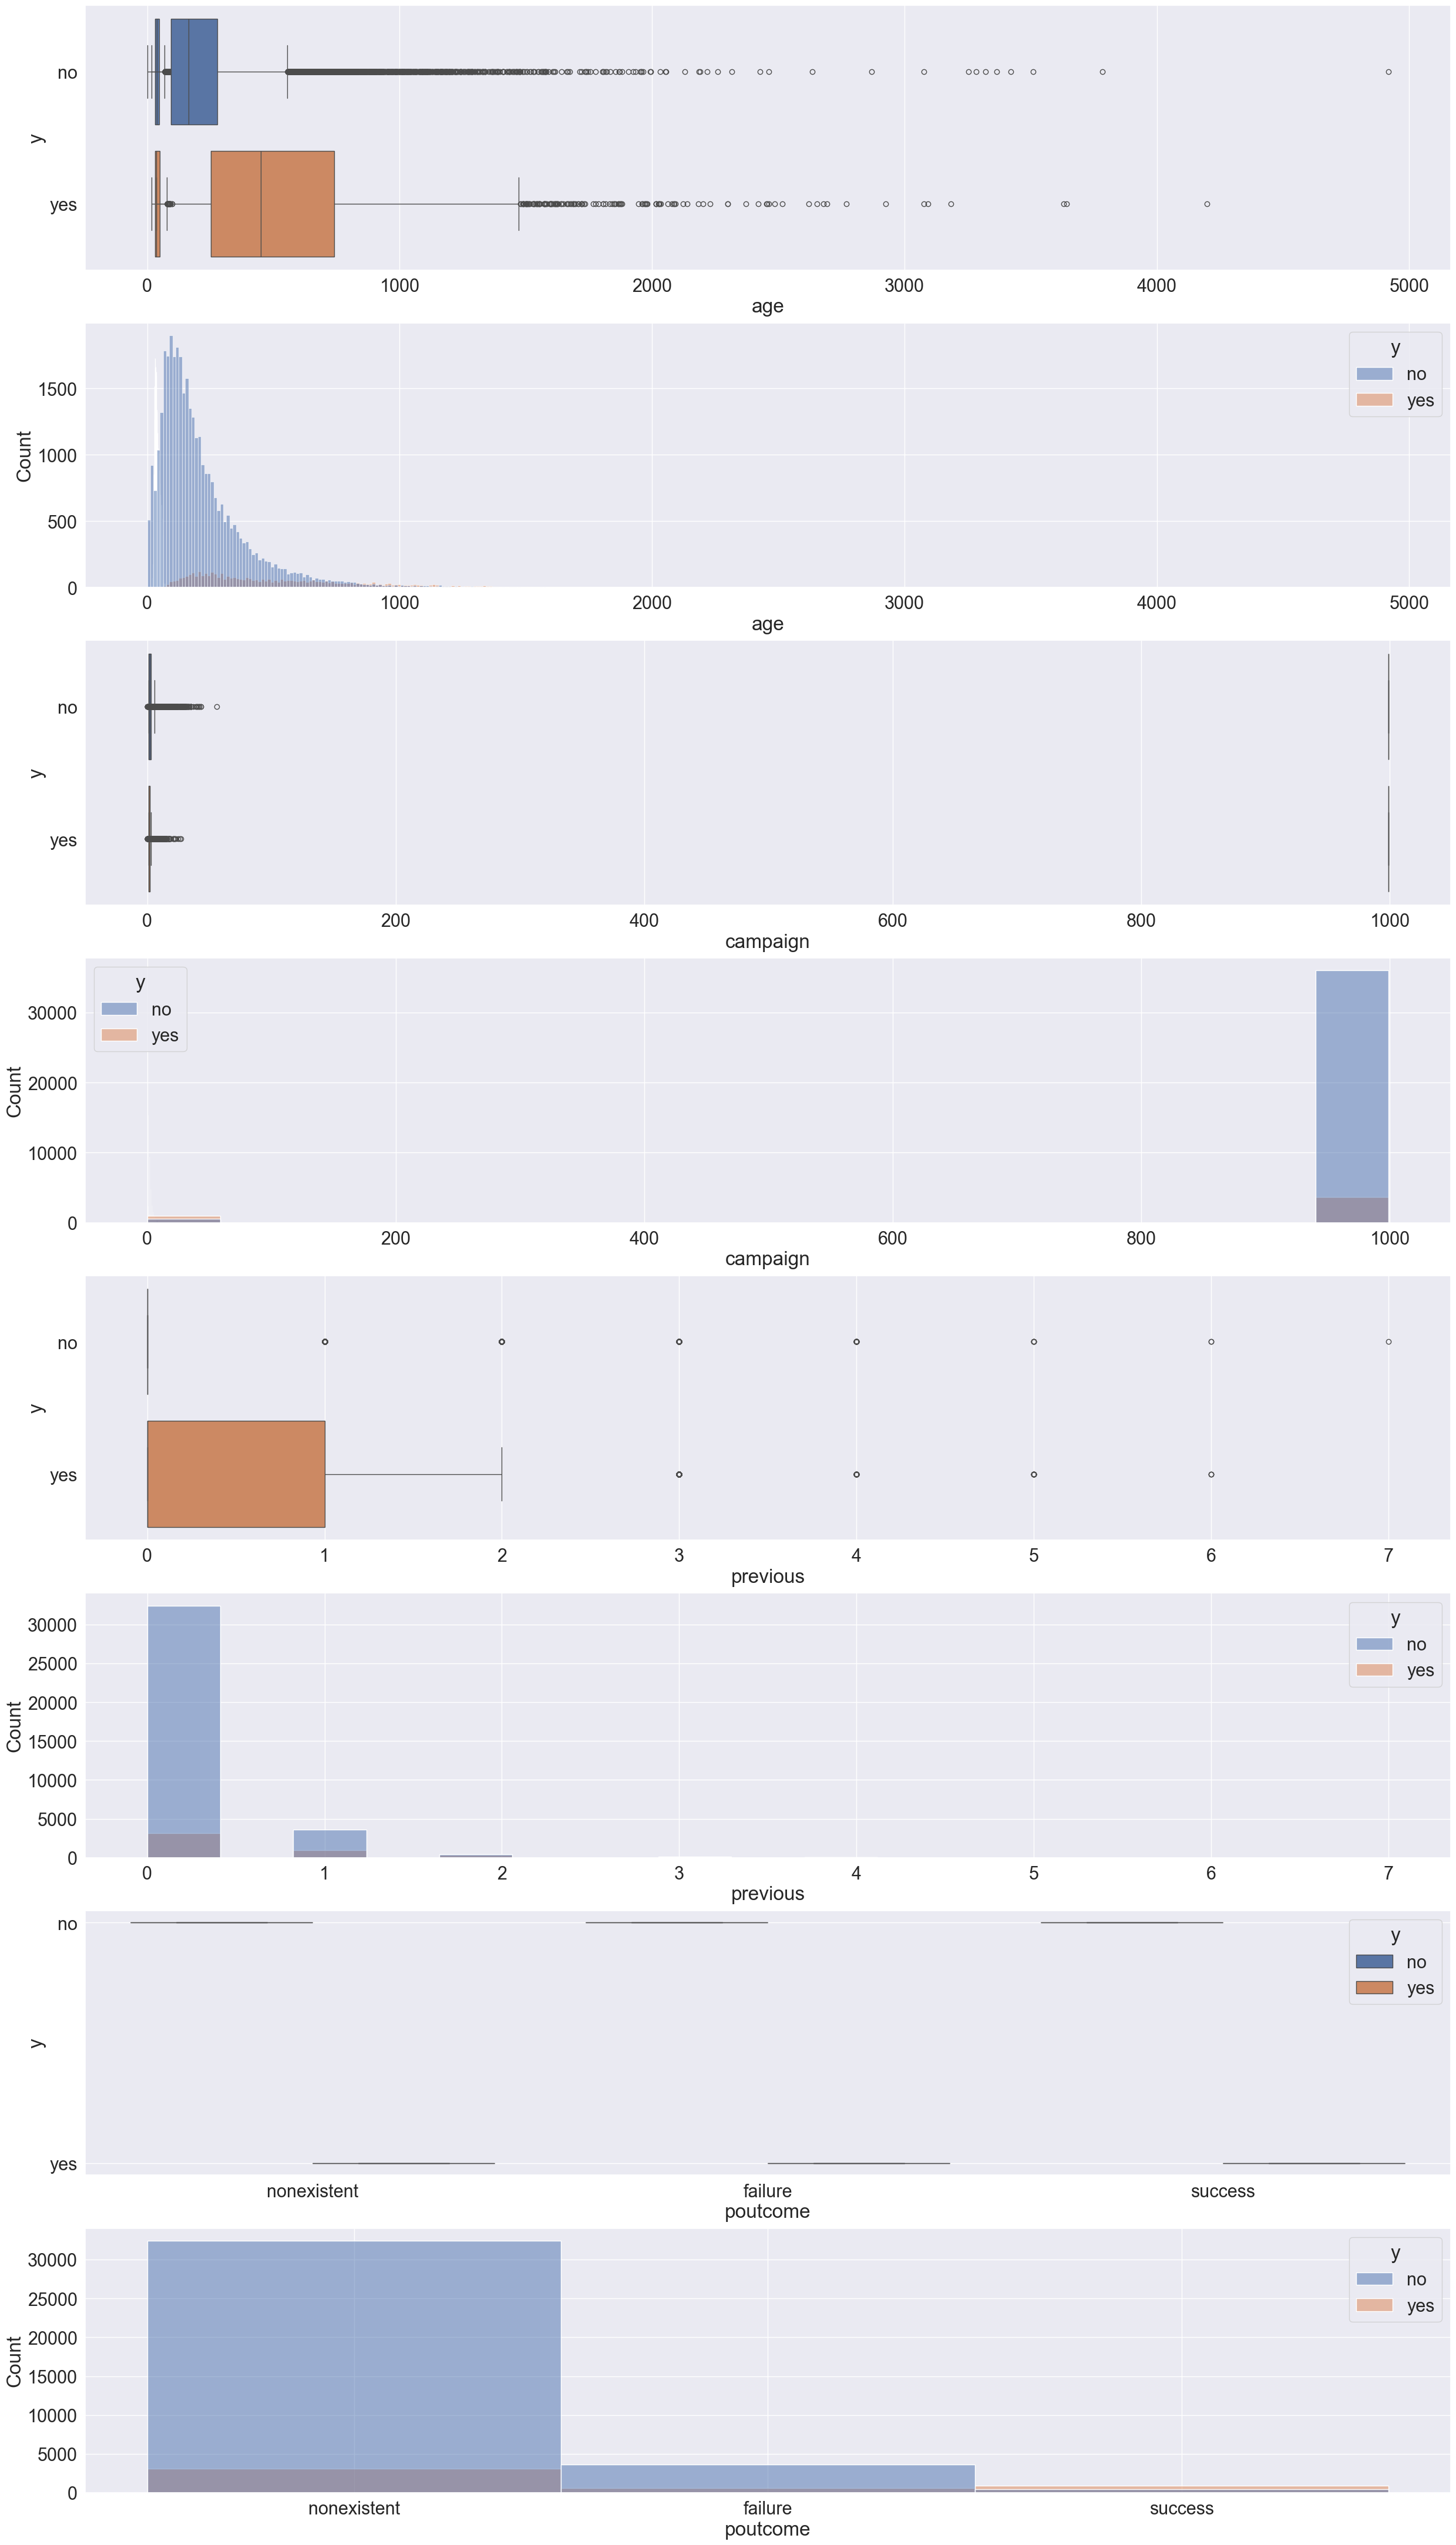

In [49]:
# Create a figure with 8 subplots arranged in a grid, with specified dimensions
fig, ax = plt.subplots(8, figsize=(30, 55))

# Set the font scale for seaborn plots to be 2
sns.set(font_scale=2)

# Plot SeniorCitizen data: boxplot and histogram
sns.boxplot(data=df, x="age", y="y", ax=ax[0], hue="y")
sns.histplot(data=df, x="age", ax=ax[1], hue="y")

# Plot SeniorCitizen data: boxplot and histogram
sns.boxplot(data=df, x="duration", y="y", ax=ax[0], hue="y")
sns.histplot(data=df, x="duration", ax=ax[1], hue="y")

# Plot tenure data: boxplot and histogram
sns.boxplot(data=df, x="campaign", y="y", ax=ax[2], hue="y")
sns.histplot(data=df, x="campaign", ax=ax[3], hue="y")

# Plot tenure data: boxplot and histogram
sns.boxplot(data=df, x="pdays", y="y", ax=ax[2], hue="y")
sns.histplot(data=df, x="pdays", ax=ax[3], hue="y")

# Plot MonthlyCharges data: boxplot and histogram
sns.boxplot(data=df, x="previous", y="y", ax=ax[4], hue="y")
sns.histplot(data=df, x="previous", ax=ax[5], hue="y")

# Plot TotalCharges data: boxplot and histogram
sns.boxplot(data=df, x="poutcome", y="y", ax=ax[6], hue="y")
sns.histplot(data=df, x="poutcome", ax=ax[7], hue="y")

# Show the plots
plt.show()

#### **Exploring Categorical columns with y (Output variable)**

In [52]:
# Select categorical columns
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
categorical_variables


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

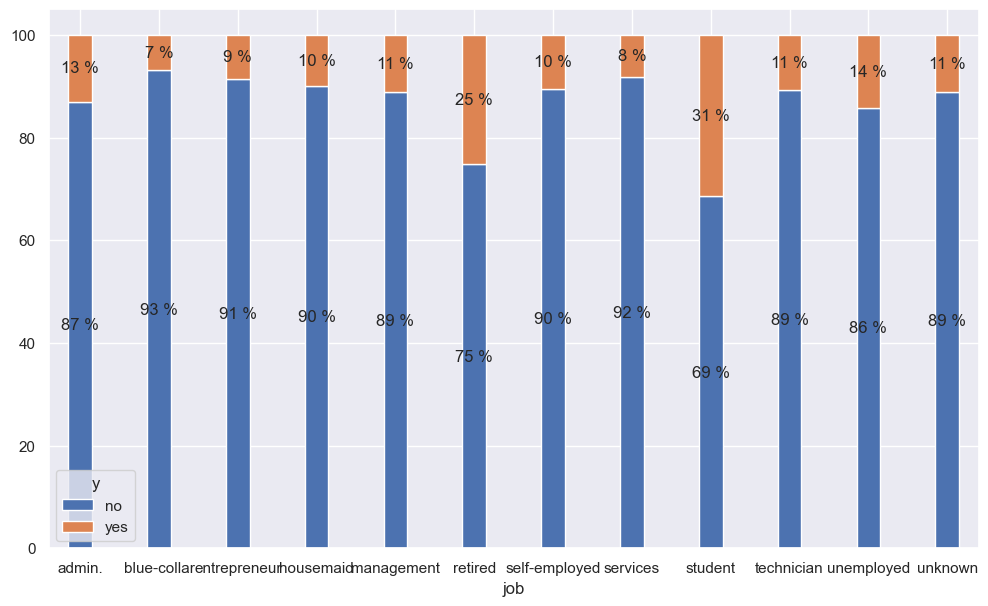

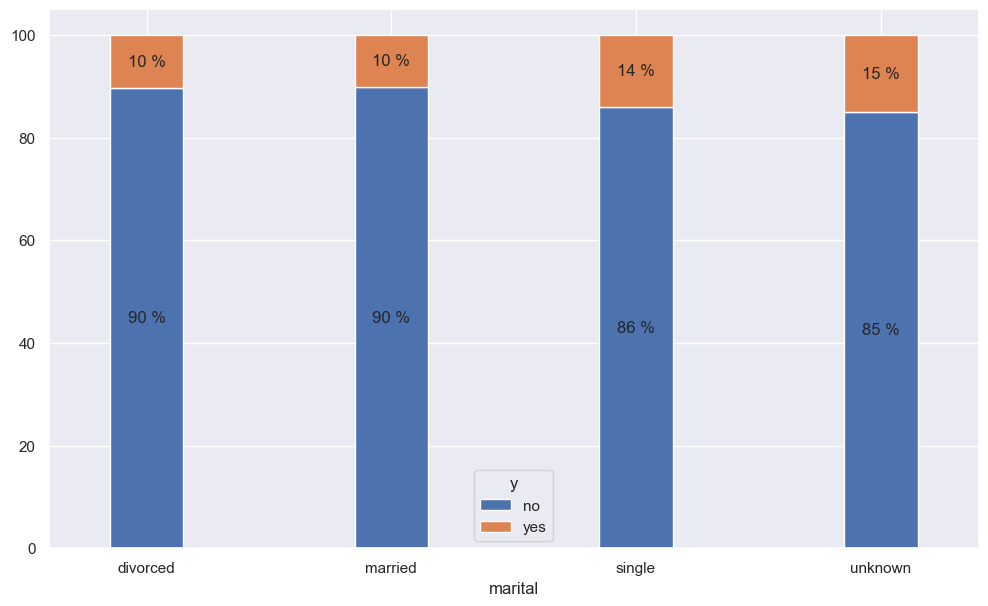

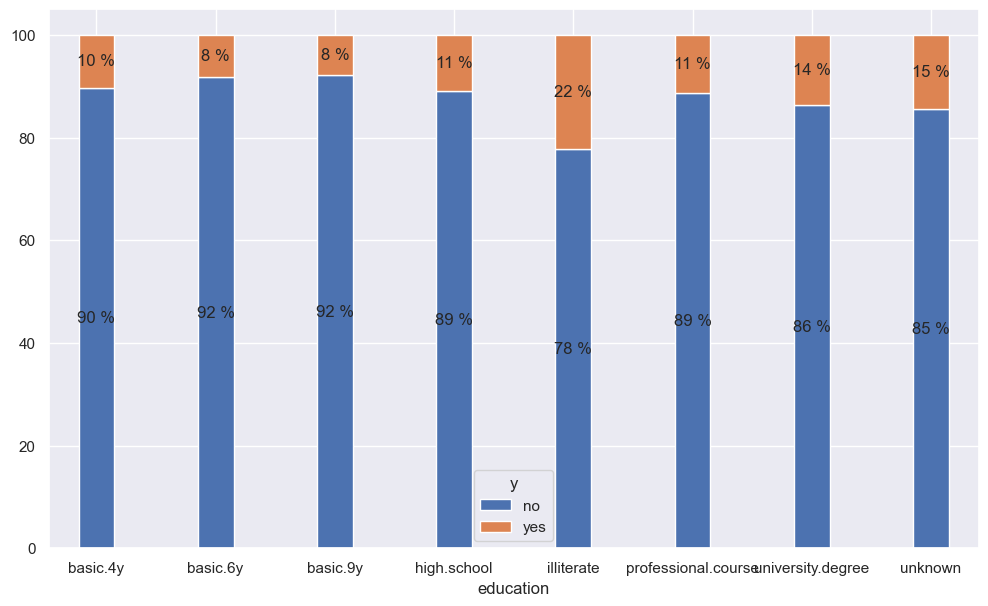

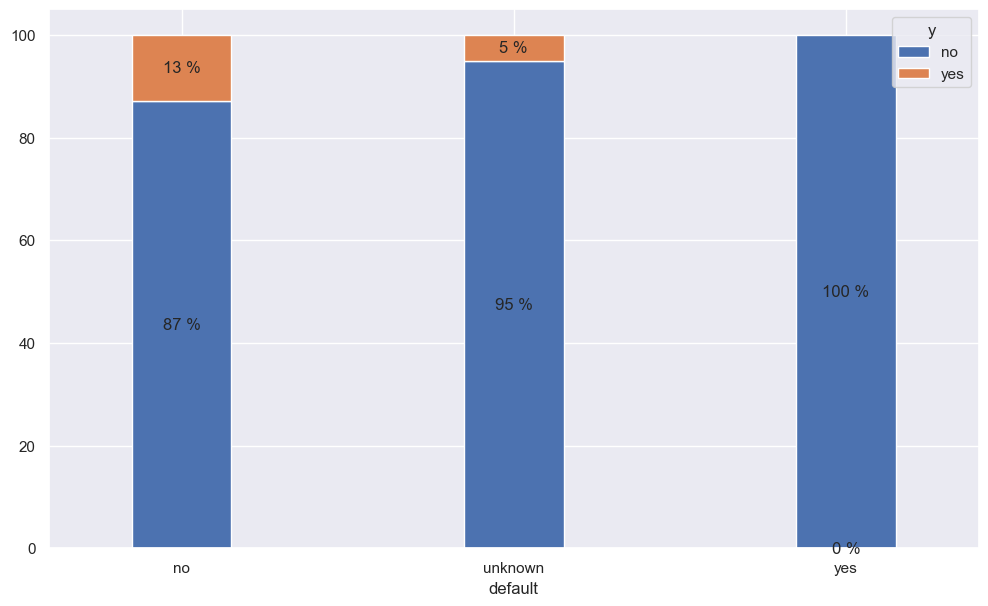

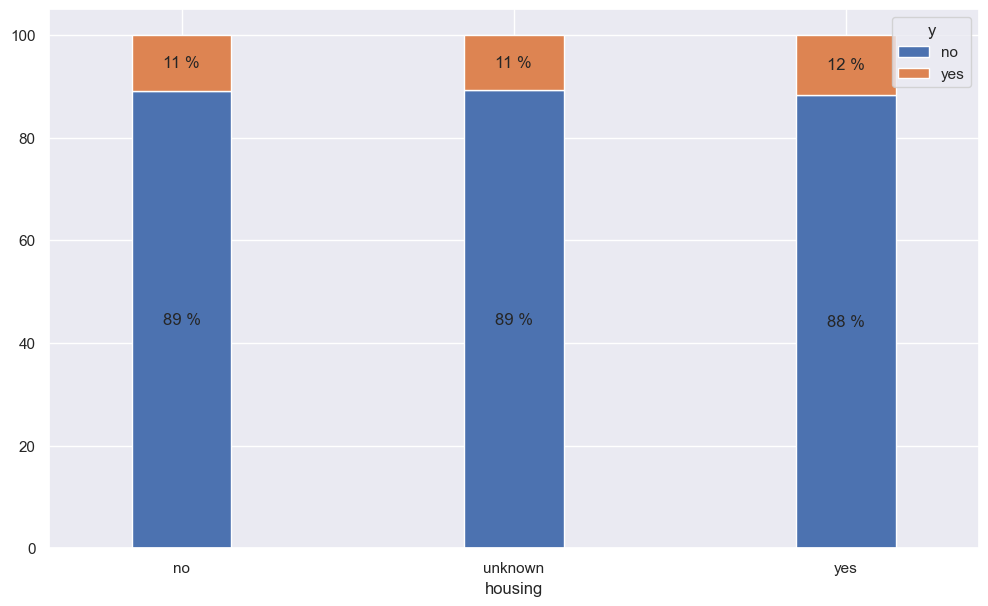

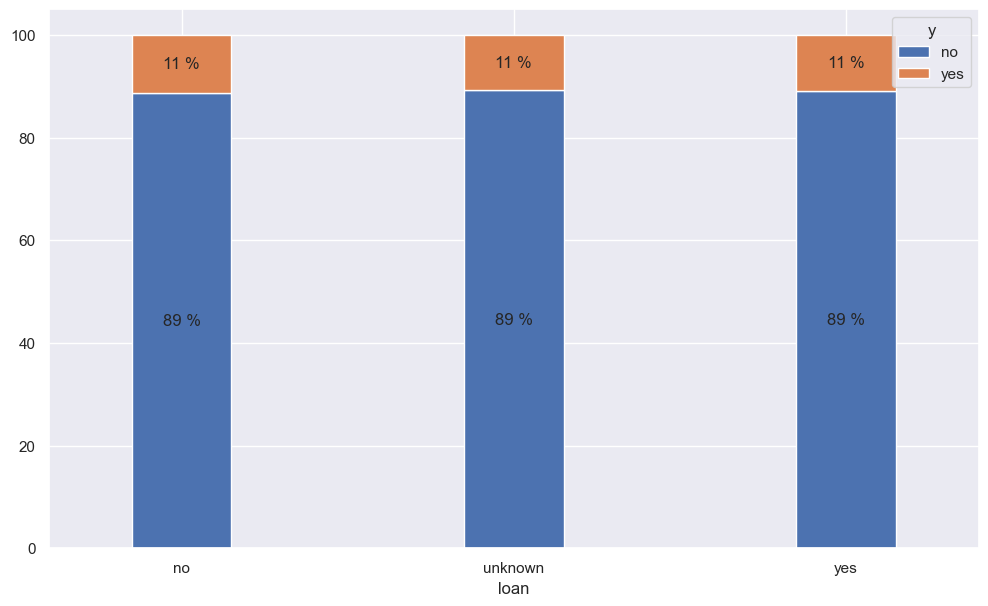

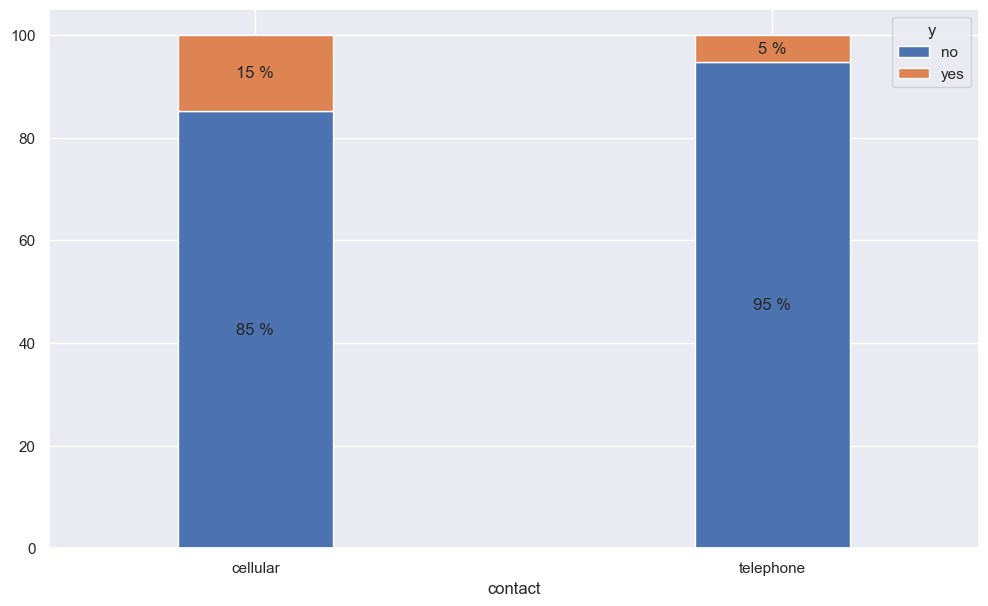

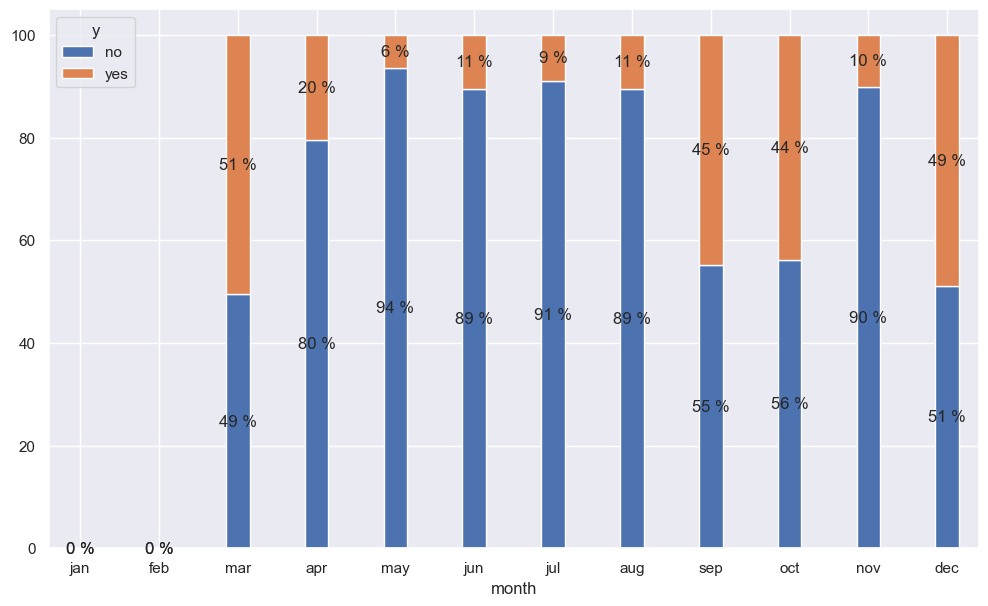

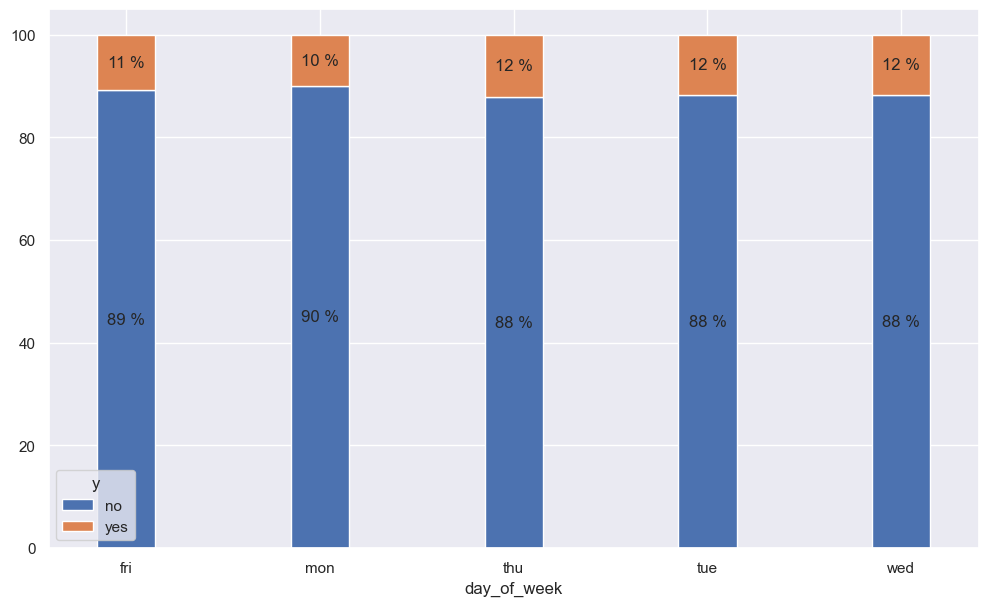

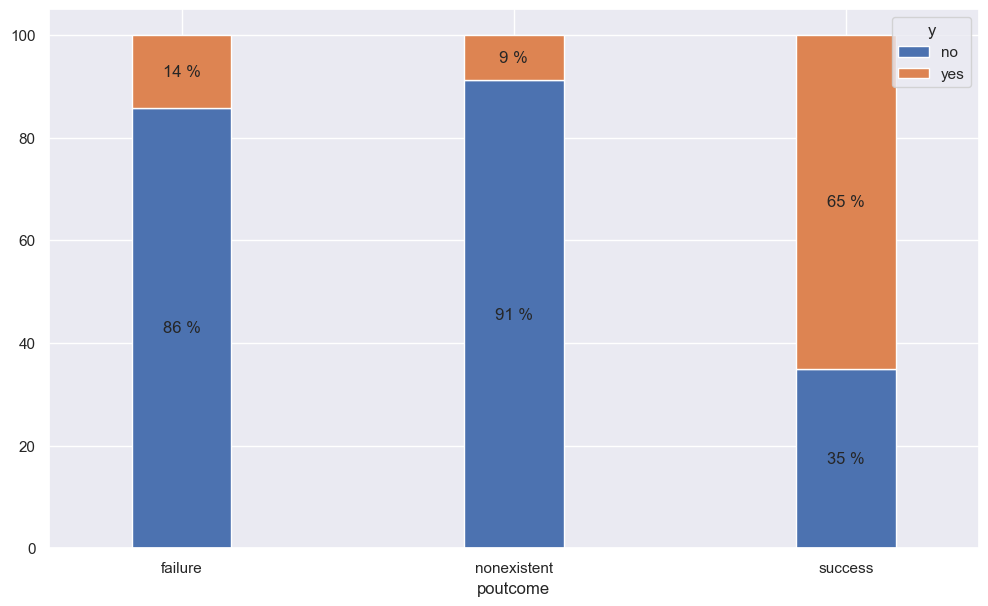

In [55]:
sns.set(font_scale=1)

# Exclude the y column
categorical_variables = [col for col in categorical_variables if col != "y"]

for i in range(len(categorical_variables)):
    # Calculate counts
    counts = df.groupby([categorical_variables[i], 'y']).size().unstack()
    
    # Plot stacked bar chart
    ax = (counts.T * 100.0 / counts.T.sum()).T.plot(
        kind='bar', width=0.3, stacked=True, rot=0, figsize=(12, 7)
    )

    # Add percentage annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.text(
            x + width / 2,
            y + height / 2,
            '{:.0f} %'.format(height),
            horizontalalignment='center',
            verticalalignment='center'
        )

### **Data Preparation**

#### Check if the dataset is balanced

In [56]:
class_distro = df['y'].value_counts().rename('Total').reset_index()
class_distro

,y,Total
0,no,36548
1,yes,4640


In [57]:
class_distro['Ratio'] = class_distro['Total'].apply(lambda x: round((x/class_distro['Total'].sum() * 100), 2))
class_distro

,y,Total,Ratio
0,no,36548,88.73
1,yes,4640,11.27


#### **Feature Selection**  

interval columns not set, guessing: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


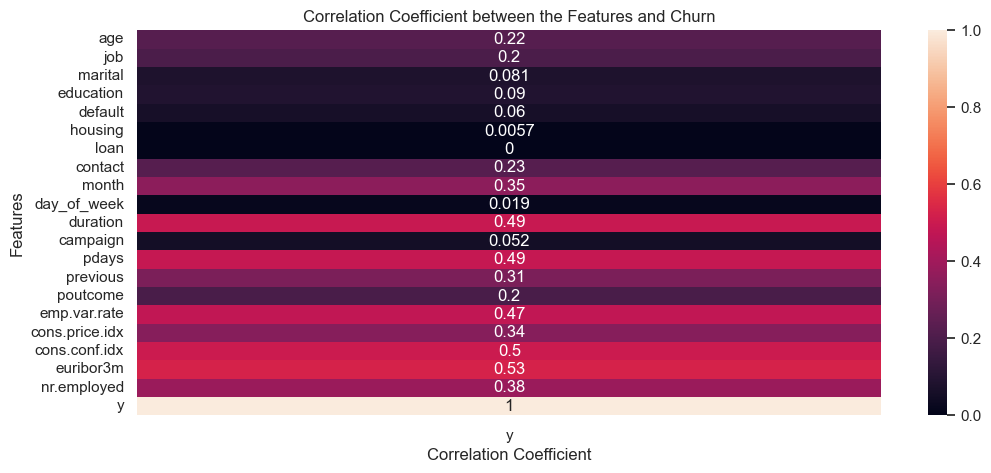

In [63]:
# Calculate the phik correlation matrix for the 'y' column
churn_corr = df.phik_matrix().loc['y']


# Set the figure size for the heatmap
plt.figure(figsize=(12, 5))

# Create a heatmap with annotations
sns.heatmap(churn_corr.to_frame(), annot=True)

# Set the title for the heatmap
plt.title('Correlation Coefficient between the Features and Target output')

# Set the labels for the y-axis and x-axis
plt.ylabel('Features')
plt.xlabel('Correlation Coefficient')

# Show the heatmap
plt.show()

#### **Split Dataset into Training and Evaluation** 

- X = input_data
- y = label

In [65]:
# Split data into X and y (train & evaluation)
X = df.drop(['y'], axis=1)
y = df['y']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [66]:
# Encode the y labels
encoder = LabelEncoder()

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [67]:
#### Prepare Pipelines
categorical_columns = X.select_dtypes('object').columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'poutcome'],
      dtype='object')

In [68]:
numeric_columns = X.select_dtypes('number').columns
numeric_columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [77]:
# Building the numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Building the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

# Combining the numeric and categorical pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numeric_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])


### **Modelling**

In [78]:
# Model selection 
models = [
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('Random_Forest', RandomForestClassifier(random_state=42)),
    ('Gradient_Boosting_Classifier', GradientBoostingClassifier(random_state=42))  
]

#### **Train on Unbalanced Dataset**

In [79]:

all_pipeline = {}

metric_table =pd.DataFrame(columns=['model_name', 'accuracy',' precision', 'recall', 'f1_score'] )

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier), 
    ])

   # Fit data to pipeline
    final_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictinary
    all_pipeline[model_name] = final_pipeline

    # Predicting on test set
    y_pred = final_pipeline.predict(X_test)

    # Generate classification report for each pipeline or model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1 = metrics['weighted avg']['f1-score']

    metric_table.loc[len(metric_table)] = [model_name, accuracy, precision, recall, f1]

metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
2,Gradient_Boosting_Classifier,0.921826,0.915698,0.921826,0.917537
1,Random_Forest,0.917092,0.908771,0.917092,0.910646
0,Logistic_Regression,0.913450,0.902594,0.913450,0.902888


#### **Train on Balanced Dataset - Using the SMOTE**

In [80]:
# Create a place to hold trained models
all_balanced_pipelines = {}

# Create a data frame to store all models metrics
balanced_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('classifier', classifier),
    ])

    # Applying SMOTE to the training data
    #X_train, y_train_encoded = smote.fit_resample(X_train, y_train_encoded)
    #pipeline=Pipeline(steps=steps)
    #X_train, y_train_encoded=pipeline.fit_resample(X_train, y_train_encoded)

    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Predicting on test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

      # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, accuracy, precision, recall, f1]

balanced_metric_table.sort_values(by='f1_score', ascending=False)

Report for Logistic_Regression
              precision    recall  f1-score   support

           0       0.97      0.91      0.94      7310
           1       0.53      0.77      0.63       928

    accuracy                           0.90      8238
   macro avg       0.75      0.84      0.78      8238
weighted avg       0.92      0.90      0.91      8238

Report for Random_Forest
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7310
           1       0.65      0.60      0.63       928

    accuracy                           0.92      8238
   macro avg       0.80      0.78      0.79      8238
weighted avg       0.92      0.92      0.92      8238

Report for Gradient_Boosting_Classifier
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7310
           1       0.59      0.75      0.66       928

    accuracy                           0.91      8238
   macro avg       0.78      0.8

,model_name,accuracy,precision,recall,f1_score
1,Random_Forest,0.919155,0.916424,0.919155,0.917638
2,Gradient_Boosting_Classifier,0.913207,0.924388,0.913207,0.917528
0,Logistic_Regression,0.897062,0.919806,0.897062,0.905126


#### **Feature Importance and Selection**

In [81]:
# Create a place to hold trained models
all_balanced_pipelines = {}

# Add confusion matrix to all pipeline
all_confusion_matrix = {}

# Create a data frame to store all models metrics
balanced_metric_table = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)

    # Add all pipelines into the all_pipeline dictionary
    all_balanced_pipelines[model_name] = balanced_pipeline

    # Predicting on test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate all matrix
    conf_matrix = confusion_matrix(y_test_encoded, y_pred)

    # Add all pipelines into the all_pipeline dictionary
    all_confusion_matrix[model_name] = conf_matrix

    # Generate classification report for each pipeline or model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Grab all important metrics
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    balanced_metric_table.loc[len(balanced_metric_table)] = [model_name, accuracy, precision, recall, f1]

balanced_metric_table.sort_values(by='f1_score', ascending=False)

,model_name,accuracy,precision,recall,f1_score
1,Random_Forest,0.919155,0.916424,0.919155,0.917638
2,Gradient_Boosting_Classifier,0.913207,0.924388,0.913207,0.917528
0,Logistic_Regression,0.897062,0.919806,0.897062,0.905126


### **Evaluation**

#### **Cross-Validation**

In [82]:
# Create an empty DataFrame to store cross-validation results
cross_val_table = pd.DataFrame(columns=['Model', 'Cross_Validation_Scores'])

# Define k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

for model_name, classifier in models:
    
    # Creating Final pipeline with preprocessor, SMOTE, feature selection, and estimator
    balanced_pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])

    # Perform cross-validation
    cv_scores = cross_val_score(balanced_pipeline, X_train, y_train_encoded, cv=k_fold, scoring='f1_weighted')

    # Add cross-validation scores to DataFrame
    mean_cv_score = cv_scores.mean()
    
    cross_val_table.loc[len(cross_val_table)] = [model_name, cv_scores]

# Create a DataFrame to store the mean cross-validation scores
score_df = pd.DataFrame(columns=['Model', 'Mean_CV_Score'])

for index, row in cross_val_table.iterrows():
    model_name = row['Model']
    mean_cv_score = row['Cross_Validation_Scores'].mean()
    score_df.loc[len(score_df)] = [model_name, mean_cv_score]

# Display the DataFrame
score_df.sort_values(by='Mean_CV_Score', ascending=False)

,Model,Mean_CV_Score
2,Gradient_Boosting_Classifier,0.911038
1,Random_Forest,0.906628
0,Logistic_Regression,0.898130


#### **Visualise Evaluation Using ROC - AUC**

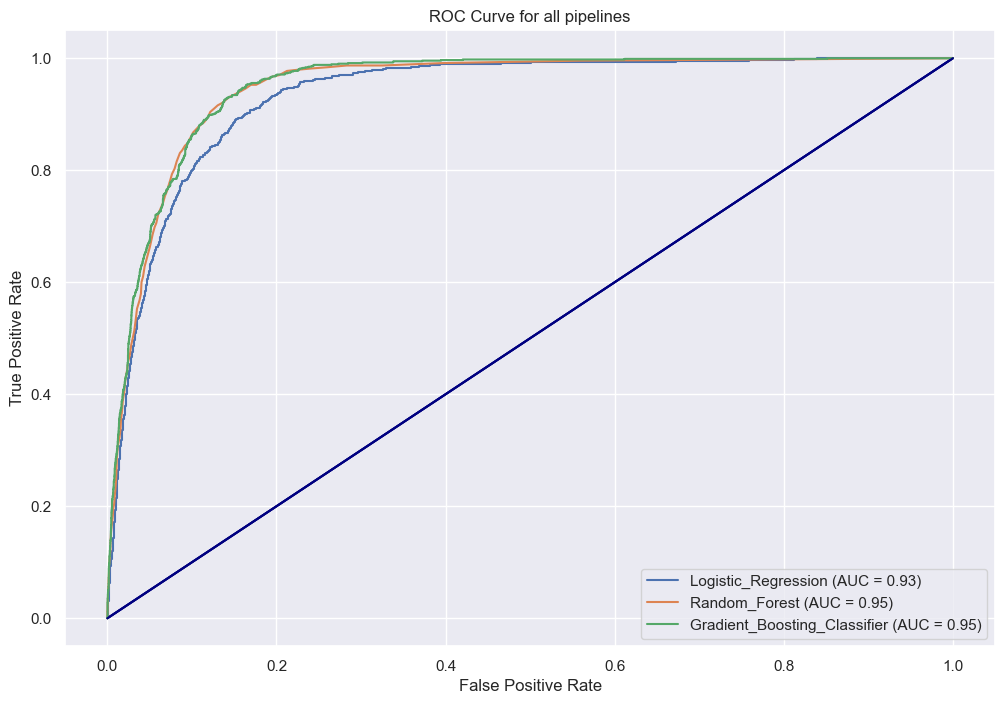

In [83]:
fig, ax = plt.subplots(figsize=(12, 8))

# Add confusion matrix to all pipeline
all_confusion_matrix = {}

all_roc_data = {}

for model_name, pipeline in all_balanced_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_data_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line
    ax.plot([0, 1], [0, 1], color='navy', linestyle='-')

    # Set labels and title
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve for all pipelines')

# Add legend to the plot
ax.legend(loc='lower right')

# Show the plot after the for loop
plt.show()


#### **Hyper-parameter Tuning**

#### Logistic Regression

In [84]:
# Define the parameter grid for grid search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
}

# Create the logistic regression model
logistic_classifier = LogisticRegression(random_state=42)

# Create the pipeline with the preprocessor and logistic regression model
logistic_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
    ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
    ('classifier', logistic_classifier)
])

# Create the grid search object
grid_search = GridSearchCV(logistic_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters are: {best_hyperparameters}")
print(f"Best score is {best_score}")


Best hyperparameters are: {'classifier__C': 0.001, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best score is 0.895660091047041


In [85]:
best_parameters = grid_search.best_params_

Retrain Model With Best Parameters

In [86]:
logistic_pipeline.set_params(**best_parameters)
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=...
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x000001BFB5636A70>)),
                ('classifier',
                 LogisticRegression(C=0.001, penalty='l1', random_state=42,
                                    solver='liblinear'))])

#### Gradient Boosting Classifier

In [87]:
# Define the parameter grid for Grid Search
param_grid = {
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    
}

# Create the logistic regression model
gradient_classifier = GradientBoostingClassifier(random_state=42)

# Create the pipeline with the preprocessor and logistic regression model
gradient_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Adding SMOTE to address data imbalance
    ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
    ('classifier', gradient_classifier)
])

# Create the grid search object
grid_search = GridSearchCV(gradient_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train_encoded)

# Get the best parameter results and best_score
best_hyperparameters = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best hyperparameters are: {best_hyperparameters}")
print(f"Best score is {best_score}")

In [ ]:
best_parameters = grid_search.best_params_

Retrain Model With Best Parameters

In [ ]:
gradient_pipeline.set_params(**best_parameters)
gradient_pipeline.fit(X_train, y_train_encoded)

#### **Test the model**

In [ ]:
# load the csv data
test_df = pd.read_csv("../datasets/bank-additional.csv", delimiter= ';')
test_df